<a href="https://colab.research.google.com/github/abhi1628/DS-ML-Projects/blob/main/Stegnography_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install stegano

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 35.8 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 11.1.0
    Uninstalling pillow-11.1.0:
      Successfully uninstalled pillow-11.1.0


In [1]:
from stegano import lsb
from PIL import Image
from google.colab import files

input_path = "/content/daniel.jpg"  # Path to your file
output_png = "/content/daniel.png"  # Temporary PNG conversion
final_output = "/content/secret_daniel.png"  # Final image with hidden link

# 2. Convert JPG → PNG (LSB steganography works best with PNG)
Image.open(input_path).save(output_png)

# 3. Hide the secret link in the PNG
secret_link = "https://pyofpython.wordpress.com"
lsb.hide(output_png, secret_link).save(final_output)

# 4. Download the final image
files.download(final_output)  # Will download the final file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
revealed_link = lsb.reveal("secret_daniel.png")
print("Hidden Link:", revealed_link)

Hidden Link: https://pyofpython.wordpress.com


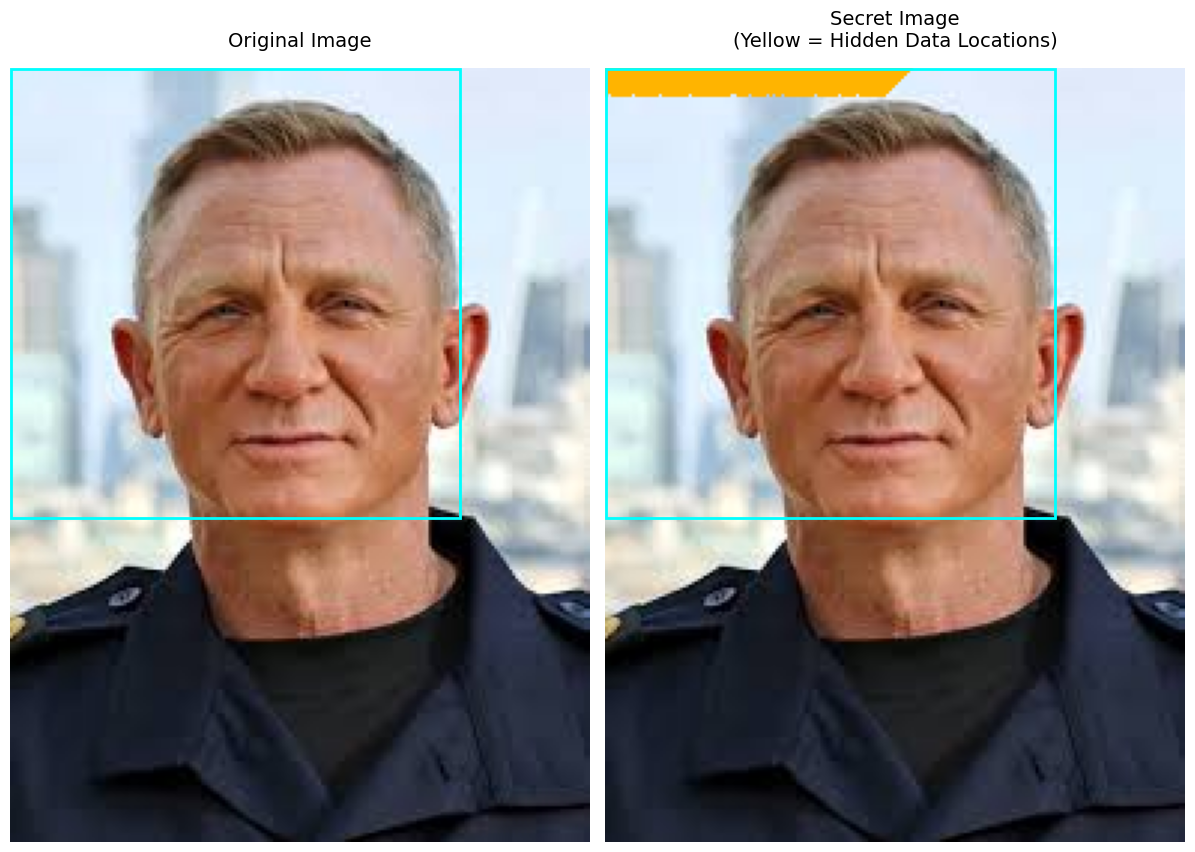

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import binary_dilation

# --- SETTINGS ---
MARKER_COLOR = [255, 180, 0]  # Bright yellow markers
MARKER_SIZE = 10                # Pixel thickness (1-3)
ZOOM_SIZE = 150                 # Size of zoomed area in pixels
# ZOOM_LOCATION = (100, 100)     # Top-left corner of zoom area (y,x)

# --- LOAD IMAGES ---
original = np.array(Image.open("/content/daniel.png").convert('RGB'))
stego = np.array(Image.open("/content/secret_daniel.png").convert('RGB'))

# --- DETECT CHANGES ---
modified_mask = np.bitwise_xor(original, stego).any(axis=-1)
if MARKER_SIZE > 1:
    modified_mask = binary_dilation(modified_mask, iterations=MARKER_SIZE-1)

# Add this after 'modified_mask = ...' to auto-center zoom on message:
if modified_mask.any():
    y, x = np.argwhere(modified_mask).mean(axis=0).astype(int)
    ZOOM_LOCATION = (max(0,y-125), max(0,x-125))  # Center zoom on message
else:
    print("No hidden message detected in LSBs!")

# Create highlighted version
highlighted = stego.copy()
highlighted[modified_mask] = MARKER_COLOR

# --- CREATE ZOOMED VIEW ---
y, x = ZOOM_LOCATION
zoom_slice = slice(y, y+ZOOM_SIZE), slice(x, x+ZOOM_SIZE)
zoom_original = original[zoom_slice]
zoom_highlighted = highlighted[zoom_slice]

# --- PLOT ---
fig = plt.figure(figsize=(18, 9))
gs = fig.add_gridspec(2, 3)

# Main images
ax1 = fig.add_subplot(gs[:, 0])
ax1.imshow(original)
ax1.set_title("Original Image", pad=15, fontsize=14)
ax1.axis('off')

ax2 = fig.add_subplot(gs[:, 1])
ax2.imshow(highlighted)
ax2.set_title("Secret Image\n(Yellow = Hidden Data Locations)", pad=15, fontsize=14)
ax2.axis('off')

# Add zoom rectangle on main images
for ax in [ax1, ax2]:
    rect = plt.Rectangle((x,y), ZOOM_SIZE, ZOOM_SIZE,
                        linewidth=2, edgecolor='cyan', facecolor='none')
    ax.add_patch(rect)

plt.tight_layout()
plt.show()

Modified pixels: 1181


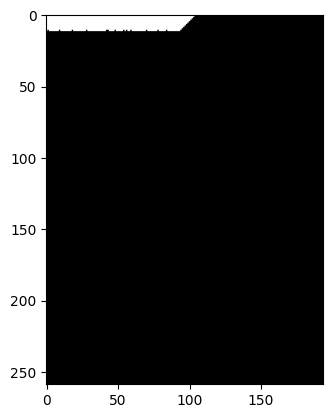

In [ ]:
print("Modified pixels:", modified_mask.sum())  # Should be >0
plt.imshow(modified_mask, cmap='gray')  # Shows exact message locations